# Import Libraries

In [1]:
import tensorflow
import matplotlib
import matplotlib.pyplot as plt

import os
# import sys
# sys.path.append('/path/to/tf_slim')
import random
import io
import imageio
import glob
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, Javascript
from IPython.display import Image as IPyImage

import tensorflow as tf

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
#from object_detection.utils import colab_utils
from object_detection.builders import model_builder

%matplotlib inline

# Define functions

In [2]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path.

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  image = image.resize((1024, 1024))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

#for multiple boxes
def plot_detections(image_np,
                    boxes,
                    classes,
                    scores,
                    category_index,
                    figsize=(12, 16),
                    image_name=None,
                   title=None):
    """Wrapper function to visualize detections.

    Args:
        image_np: uint8 numpy array with shape (img_height, img_width, 3)
        boxes: a numpy array of shape [N, 4]
        classes: a numpy array of shape [N]. Note that class indices are 1-based,
            and match the keys in the label map.
        scores: a numpy array of shape [N] or None.  If scores=None, then
            this function assumes that the boxes to be plotted are groundtruth
            boxes and plot all boxes as black with no classes or scores.
        category_index: a dict containing category dictionaries (each holding
            category index `id` and category name `name`) keyed by category indices.
        figsize: size for the figure.
        image_name: a name for the image file.
    """
    image_np_with_annotations = image_np.copy()
    if scores is None:
        scores = np.ones_like(classes, dtype=np.float32)
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_annotations,
        boxes,
        classes,
        scores,
        category_index,
        use_normalized_coordinates=True,
        min_score_thresh=0.35,
        line_thickness=2)
    if image_name:
        plt.imsave(image_name, image_np_with_annotations)
    else:
        plt.figure(figsize=figsize)
        plt.imshow(image_np_with_annotations)
        if title:
            plt.title(title)
        plt.show()

# Load the saved model

In [3]:
loaded_module = tf.saved_model.load('C:/Users/xiaoq/Downloads/FYP 1024 resnet/current_best')
loaded_detection_fn = loaded_module.detect
loaded_fine_tuned_model = loaded_module.detection_model


# Redefine variable

In [4]:
junction_class_id = 1
num_classes = 1
category_index = {junction_class_id: {'id': junction_class_id, 'name': 'junction'}}

# Test Images

Detection boxes for image 1 :
tf.Tensor(
[[[0.50576365 0.47060275 0.8070489  1.        ]
  [0.38797212 0.34807837 0.53366125 0.5896892 ]
  [0.48871428 0.6079808  0.5307315  0.68617886]
  [0.39782768 0.00193986 0.6464166  0.55687916]
  [0.37238204 0.333566   0.49385798 0.57379264]
  [0.5466908  0.5922349  0.7817019  0.9584252 ]
  [0.46297404 0.44945073 0.73319066 0.99584055]
  [0.45860776 0.6019269  0.52107394 0.71123946]
  [0.49876294 0.61848235 0.53711593 0.6882447 ]
  [0.44230193 0.6033146  0.50478053 0.7162666 ]
  [0.42165995 0.31235856 0.54621667 0.53781164]
  [0.47537705 0.6230359  0.53033614 0.69382393]
  [0.46179885 0.7068474  0.529753   0.8248174 ]
  [0.43649983 0.4533596  0.6477176  0.9690589 ]
  [0.41654736 0.1630562  0.63696903 0.6215669 ]
  [0.5850436  0.6972619  0.8008633  0.98337615]
  [0.47958758 0.60100585 0.52234834 0.6695371 ]
  [0.46115866 0.6230868  0.5098094  0.69064975]
  [0.41774338 0.37868094 0.5485124  0.6393732 ]
  [0.49033555 0.09559469 0.7146207  0.5372393 ]

<Figure size 1000x1000 with 0 Axes>

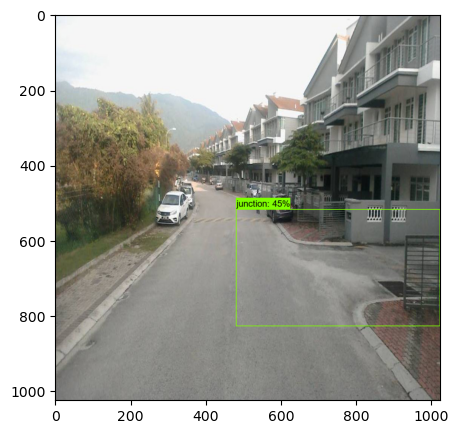

Detection boxes for image 2 :
tf.Tensor(
[[[0.66676116 0.6502948  0.8421804  1.        ]
  [0.6330383  0.6566829  0.78879666 0.975993  ]
  [0.5895218  0.44209695 0.70582336 0.75082064]
  [0.70587087 0.6977445  0.8547752  0.9796684 ]
  [0.5547173  0.15355262 0.77643526 0.6641432 ]
  [0.5679281  0.7815645  0.6360283  0.8966055 ]
  [0.58021045 0.7904251  0.61676645 0.85658854]
  [0.58453465 0.42592266 0.875566   0.99647033]
  [0.54991174 0.4169839  0.6666808  0.67830986]
  [0.58505493 0.563566   0.6894434  0.80573016]
  [0.56942034 0.20632088 0.6931499  0.4634182 ]
  [0.6254935  0.07948665 0.7872317  0.38802832]
  [0.5675219  0.77752215 0.60628355 0.84816927]
  [0.59857094 0.6687288  0.7379     0.9563384 ]
  [0.661733   0.75163347 0.8193744  0.99324566]
  [0.7012569  0.77299374 0.8099879  0.93793136]
  [0.5553369  0.76788753 0.5995514  0.8553631 ]
  [0.4804897  0.11151075 0.69378364 0.64580244]
  [0.6173362  0.5860203  0.8189145  0.91889054]
  [0.60768926 0.12441821 0.738914   0.40787637]

<Figure size 1000x1000 with 0 Axes>

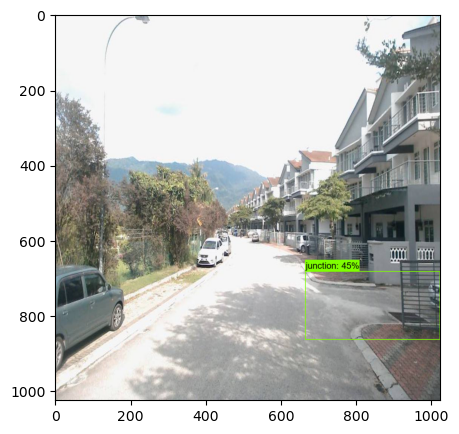

Detection boxes for image 3 :
tf.Tensor(
[[[0.5478168  0.5004908  0.70100933 0.74870396]
  [0.5279254  0.29668975 0.64669764 0.5450916 ]
  [0.5535375  0.2972875  0.691579   0.5317784 ]
  [0.5808673  0.53102404 0.74481404 0.8069716 ]
  [0.5029946  0.31358564 0.60797435 0.566391  ]
  [0.5849982  0.19269678 0.72924167 0.4350802 ]
  [0.51649994 0.482599   0.6629159  0.7279872 ]
  [0.4700377  0.18174028 0.7384242  0.7120658 ]
  [0.53408444 0.41413933 0.68791103 0.72702223]
  [0.49175248 0.12457317 0.79822934 0.6138131 ]
  [0.5384405  0.5214561  0.6626522  0.68694305]
  [0.56169    0.055877   0.90319633 0.54137754]
  [0.62598425 0.18917039 0.7679129  0.42392513]
  [0.5636657  0.2552213  0.70971066 0.4938373 ]
  [0.6527853  0.6175901  0.69386995 0.7142468 ]
  [0.50482196 0.42361927 0.81456083 0.9286144 ]
  [0.55972916 0.56024736 0.68736035 0.71981376]
  [0.49674088 0.290581   0.78214306 0.82121444]
  [0.64414066 0.54949343 0.8066885  0.83368695]
  [0.47086155 0.320574   0.5893276  0.5835886 ]

<Figure size 1000x1000 with 0 Axes>

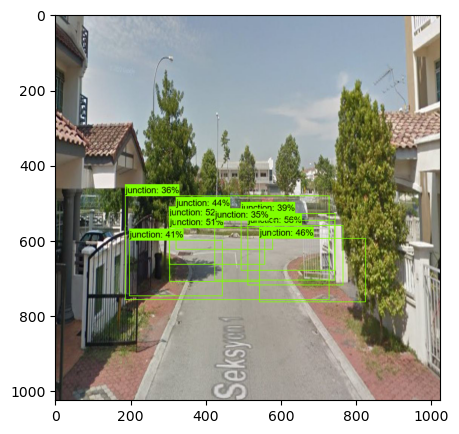

Detection boxes for image 4 :
tf.Tensor(
[[[0.60590065 0.16120061 0.77529776 0.41387317]
  [0.61541855 0.20692481 0.7461754  0.4800499 ]
  [0.6090149  0.18677075 0.78902346 0.52856445]
  [0.5831386  0.2723392  0.70536923 0.5311103 ]
  [0.6104173  0.10768839 0.7349648  0.3477348 ]
  [0.60219777 0.25437737 0.7481388  0.5696827 ]
  [0.5905956  0.22757187 0.708467   0.43995324]
  [0.6161281  0.5188712  0.7837262  0.8016417 ]
  [0.6336528  0.2084427  0.75311995 0.37747568]
  [0.5876364  0.07071295 0.82870656 0.5866016 ]
  [0.60634035 0.49331838 0.75181836 0.7530449 ]
  [0.64439166 0.20213753 0.822893   0.48872852]
  [0.6230349  0.2332491  0.7249686  0.38905963]
  [0.6103406  0.33612943 0.7478342  0.63935035]
  [0.59802437 0.43389374 0.64353657 0.5258113 ]
  [0.6199424  0.27746627 0.710685   0.44182554]
  [0.6216973  0.07688771 0.8138455  0.38084793]
  [0.6050974  0.05875815 0.76343083 0.32407922]
  [0.3766703  0.00858228 0.82586044 0.40228426]
  [0.6134758  0.19034757 0.72740376 0.34214586]

<Figure size 1000x1000 with 0 Axes>

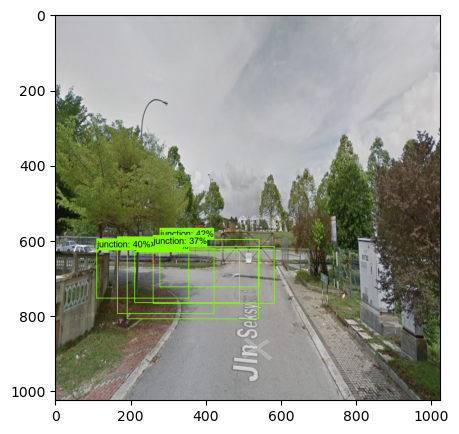

Detection boxes for image 5 :
tf.Tensor(
[[[0.29155266 0.2640662  0.4044732  0.5013832 ]
  [0.2791593  0.29978615 0.38381732 0.53331476]
  [0.43477198 0.05778676 0.79244506 0.58540845]
  [0.2705365  0.6803203  0.39652833 0.89675313]
  [0.31099454 0.44032395 0.38794932 0.57098734]
  [0.3536778  0.22873145 0.74268323 0.6886856 ]
  [0.5067848  0.0416548  0.90017176 0.5901754 ]
  [0.33201838 0.26810354 0.62427664 0.72244304]
  [0.2730462  0.46871376 0.39555115 0.70810175]
  [0.30507964 0.3285824  0.3678944  0.457586  ]
  [0.5108191  0.10489985 0.68147194 0.4290898 ]
  [0.29655132 0.2637276  0.35560623 0.39724737]
  [0.37682092 0.49937373 0.6494554  0.9208893 ]
  [0.31298605 0.27408135 0.3669956  0.4117635 ]
  [0.60361576 0.10350281 0.82536066 0.35187536]
  [0.2872225  0.28725338 0.32269055 0.35640752]
  [0.29736114 0.33462745 0.32778925 0.39840746]
  [0.6669276  0.10289548 0.9105536  0.37220412]
  [0.36127648 0.3178941  0.6928412  0.8626573 ]
  [0.2930299  0.6674043  0.42860508 0.92298603]

<Figure size 1000x1000 with 0 Axes>

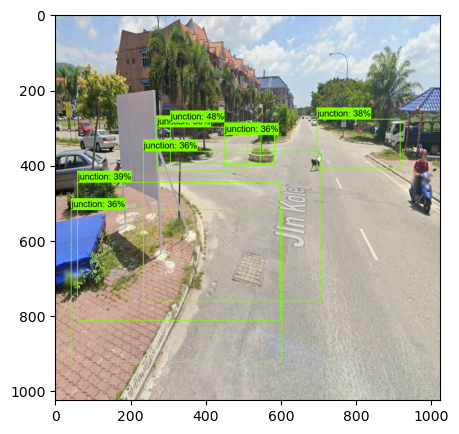

Detection boxes for image 6 :
tf.Tensor(
[[[0.50576365 0.47060275 0.8070489  1.        ]
  [0.38797212 0.34807837 0.53366125 0.5896892 ]
  [0.48871428 0.6079808  0.5307315  0.68617886]
  [0.39782768 0.00193986 0.6464166  0.55687916]
  [0.37238204 0.333566   0.49385798 0.57379264]
  [0.5466908  0.5922349  0.7817019  0.9584252 ]
  [0.46297404 0.44945073 0.73319066 0.99584055]
  [0.45860776 0.6019269  0.52107394 0.71123946]
  [0.49876294 0.61848235 0.53711593 0.6882447 ]
  [0.44230193 0.6033146  0.50478053 0.7162666 ]
  [0.42165995 0.31235856 0.54621667 0.53781164]
  [0.47537705 0.6230359  0.53033614 0.69382393]
  [0.46179885 0.7068474  0.529753   0.8248174 ]
  [0.43649983 0.4533596  0.6477176  0.9690589 ]
  [0.41654736 0.1630562  0.63696903 0.6215669 ]
  [0.5850436  0.6972619  0.8008633  0.98337615]
  [0.47958758 0.60100585 0.52234834 0.6695371 ]
  [0.46115866 0.6230868  0.5098094  0.69064975]
  [0.41774338 0.37868094 0.5485124  0.6393732 ]
  [0.49033555 0.09559469 0.7146207  0.5372393 ]

<Figure size 1000x1000 with 0 Axes>

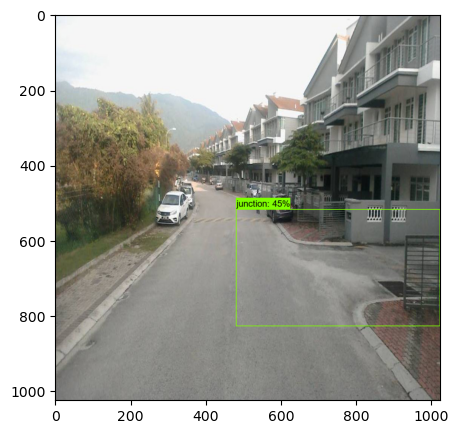

Detection boxes for image 7 :
tf.Tensor(
[[[0.30100304 0.53593993 0.62552464 1.        ]
  [0.31488198 0.60288    0.36762106 0.7068237 ]
  [0.22807994 0.49672848 0.5597185  1.        ]
  [0.31134585 0.0611999  0.4947594  0.21939036]
  [0.20407777 0.40422723 0.44611877 0.89377606]
  [0.2883764  0.4235192  0.34345335 0.5366619 ]
  [0.3084905  0.5229063  0.35719723 0.61761606]
  [0.3084648  0.6153858  0.3838319  0.7501854 ]
  [0.26666987 0.41910207 0.3949119  0.6708007 ]
  [0.3740275  0.04714227 0.55117095 0.204817  ]
  [0.3467101  0.27567396 0.38793224 0.37134388]
  [0.34086412 0.08701642 0.5194176  0.2569393 ]
  [0.29059947 0.46602762 0.41544187 0.71042764]
  [0.35684362 0.29478672 0.39591548 0.37284657]
  [0.26857793 0.37367165 0.39305407 0.59057605]
  [0.1917827  0.5818684  0.55569047 0.8743726 ]
  [0.2099435  0.71453893 0.5481436  1.        ]
  [0.36124212 0.2998557  0.40431714 0.38783044]
  [0.27002734 0.39886674 0.33539557 0.52363956]
  [0.32811314 0.03085865 0.528396   0.18791156]

<Figure size 1000x1000 with 0 Axes>

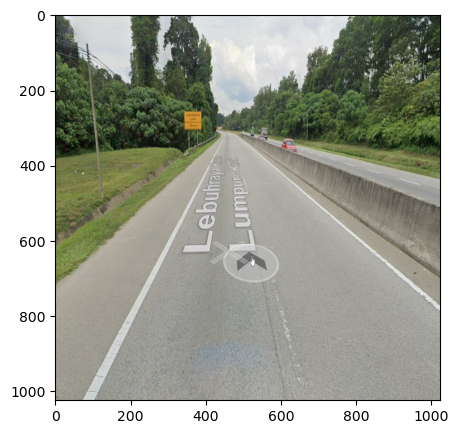

Detection boxes for image 8 :
tf.Tensor(
[[[2.5651354e-01 4.2674667e-01 3.9682049e-01 7.2332579e-01]
  [2.9324514e-01 4.4603217e-01 4.1992038e-01 7.1192575e-01]
  [4.3358517e-01 6.9391072e-01 8.1236649e-01 1.0000000e+00]
  [3.3952761e-01 3.5339174e-01 4.8455542e-01 6.0251713e-01]
  [4.0703279e-01 6.5079069e-01 7.7689570e-01 9.3500924e-01]
  [3.7499857e-01 5.1851642e-01 6.6873419e-01 1.0000000e+00]
  [4.3241736e-01 6.9703066e-01 6.4911795e-01 9.4185591e-01]
  [3.6992812e-01 3.4877753e-01 5.6673801e-01 5.8365691e-01]
  [3.2575345e-01 4.9944520e-01 4.0531957e-01 6.6971171e-01]
  [3.2021299e-01 4.9939626e-01 4.4404158e-01 7.2947878e-01]
  [4.7164339e-01 7.3183233e-01 6.9503862e-01 9.6899396e-01]
  [2.7359268e-01 3.2033074e-01 4.3183294e-01 6.0872680e-01]
  [5.4179853e-01 4.8680228e-01 5.8576208e-01 5.3220409e-01]
  [2.9729182e-01 4.5830184e-01 6.2585598e-01 9.5786864e-01]
  [3.4967318e-01 5.0146329e-01 4.3621060e-01 6.3891363e-01]
  [2.9673100e-01 6.9889808e-01 7.3393857e-01 1.0000000e+00]

<Figure size 1000x1000 with 0 Axes>

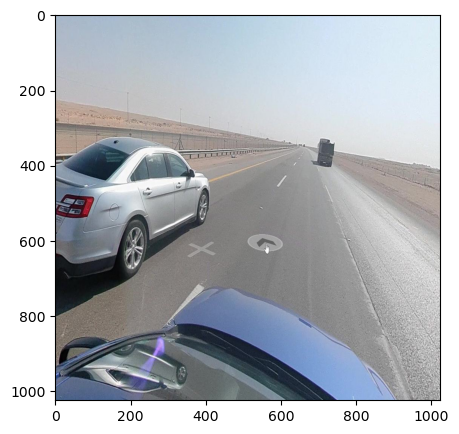

In [21]:
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

test_image_dir = 'test'
test_images_np = []
for i in range(1, 9):
  image_path = os.path.join(test_image_dir, 'c_img' + str(i) + '.jpeg')
  test_images_np.append(np.expand_dims(
      load_image_into_numpy_array(image_path), axis=0))

label_id_offset = 1
for i in range(len(test_images_np)):
  input_tensor = tf.convert_to_tensor(test_images_np[i], dtype=tf.float32)
#print(input_tensor.shape)
  detections = loaded_detection_fn(input_tensor)
    
  #Print detection boxes for current image
  print('Detection boxes for image', i+1, ':')
  print(detections['detection_boxes'])
  print('detection_scores')
  print(detections['detection_scores'])
  plt.figure(figsize=(10, 10))

  plot_detections(
      test_images_np[i][0],
      detections['detection_boxes'][0].numpy(),
      detections['detection_classes'][0].numpy().astype(np.uint32) + label_id_offset,
      detections['detection_scores'][0].numpy(),
      category_index, 
      figsize=(30, 5))
  plt.show()



# Define IOU function

In [8]:
# ymin, xmin, ymax, xmax
def iou(box1, box2):
    # Calculate the coordinates of the intersection rectangle
    x1 = max(box1[1], box2[1])
    y1 = max(box1[0], box2[0])
    x2 = min(box1[3], box2[3])
    y2 = min(box1[2], box2[2])
    intersection_area = max(0, x2 - x1) * max(0, y2 - y1)

    # Calculate the area of each bounding box
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    # Calculate the union area
    union_area = box1_area + box2_area - intersection_area

    # Calculate the IoU
    iou = intersection_area / union_area if union_area > 0 else 0

    return iou


# Performance Evaluation for c_img1

## get coordination of ground truth bounding box for c_img1

In [9]:
label_id_offset = 1
input_tensor = tf.convert_to_tensor(test_images_np[0], dtype=tf.float32)
detections = loaded_detection_fn(input_tensor)

#set threshold to 0.3
score_threshold = 0.3
above_threshold_indices = np.where(detections['detection_scores'][0].numpy() > score_threshold)

boxes = detections['detection_boxes'][0].numpy()[above_threshold_indices]
scores = detections['detection_scores'][0].numpy()[above_threshold_indices]

## get the coordination of predicted bounding box for c_img1

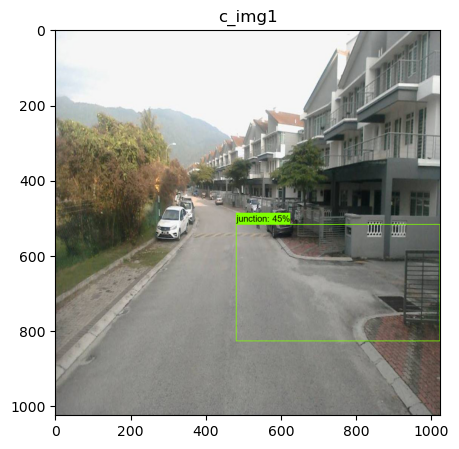

In [10]:
# Convert the normalized coordinates to pixel values
ymin_predicted_1, xmin_predicted_1, ymax_predicted_1, xmax_predicted_1 = boxes[0]
height, width, _ = test_images_np[0][0].shape
xmin_predicted_1 = int(xmin_predicted_1 * width)
xmax_predicted_1 = int(xmax_predicted_1 * width)
ymin_predicted_1 = int(ymin_predicted_1 * height)
ymax_predicted_1 = int(ymax_predicted_1 * height)

plot_detections(
    test_images_np[0][0],
    detections['detection_boxes'][0].numpy(),
    detections['detection_classes'][0].numpy().astype(np.uint32) + label_id_offset,
    detections['detection_scores'][0].numpy(),
    category_index, 
    title = "c_img1",
    figsize=(30, 5))
plt.show()

## calculate IOU

In [11]:
import xml.etree.ElementTree as ET

# Parse the XML file
tree = ET.parse('test/c_img1.xml')
root = tree.getroot()

image_height = 1024
image_width = 1024


i = 1
#Iterate over each object element
for obj in root.findall('object'):
    xmin_ground_2 = int(obj.find('bndbox/xmin').text)
    ymin_ground_2 = int(obj.find('bndbox/ymin').text)
    xmax_ground_2 = int(obj.find('bndbox/xmax').text)
    ymax_ground_2 = int(obj.find('bndbox/ymax').text)

    
    
    ground_truth_box = [ymin_ground_2, xmin_ground_2, ymax_ground_2, xmax_ground_2]
    
    predicted_boxes = boxes.tolist()  # convert Numpy array to list of predicted bounding boxes

    # Initialize a list to store the highest IoU for each ground truth bounding box
    #highest_iou_list = [-1] * len(ground_truth_boxe)

    # Initialize a variable to keep track of the highest IoU for this predicted box
    highest_iou_for_predicted_box = 0
    # Iterate over each predicted bounding box
    for predicted_box in predicted_boxes:
        
        # Convert the predicted box coordinates from normalized values to pixel values
        ymin, xmin, ymax, xmax = predicted_box
        xmin = int(xmin * image_width)
        xmax = int(xmax * image_width)
        ymin = int(ymin * image_height)
        ymax = int(ymax * image_height)
        predicted_box_box = [ymin, xmin, ymax, xmax]

        iou_score = iou(ground_truth_box, predicted_box_box)
        
        #update the highest IoU for this predicted box, if necessary
        if iou_score > highest_iou_for_predicted_box:
            highest_iou_for_predicted_box = iou_score

    # Print the highest IoU for this predicted box
    print(f'Highest IoU for ground truth box {i}:', highest_iou_for_predicted_box)
    print('\n')
    i += 1




Highest IoU for ground truth box 1: 0.5685496305264




## display image and IoU together c_img1

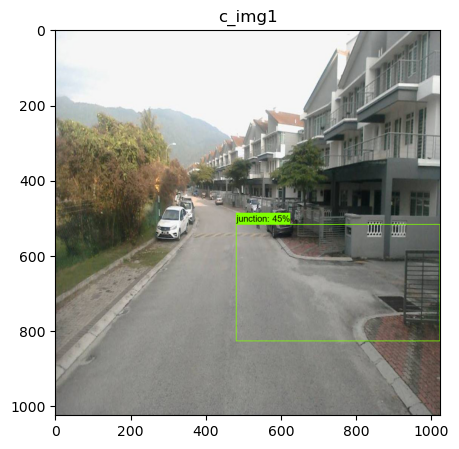

Highest IoU for ground truth box 1: 0.5685496305264




In [12]:
import xml.etree.ElementTree as ET

# Convert the normalized coordinates to pixel values
ymin_predicted_1, xmin_predicted_1, ymax_predicted_1, xmax_predicted_1 = boxes[0]
height, width, _ = test_images_np[0][0].shape
xmin_predicted_1 = int(xmin_predicted_1 * width)
xmax_predicted_1 = int(xmax_predicted_1 * width)
ymin_predicted_1 = int(ymin_predicted_1 * height)
ymax_predicted_1 = int(ymax_predicted_1 * height)

plot_detections(
    test_images_np[0][0],
    detections['detection_boxes'][0].numpy(),
    detections['detection_classes'][0].numpy().astype(np.uint32) + label_id_offset,
    detections['detection_scores'][0].numpy(),
    category_index, 
    title = "c_img1",
    figsize=(30, 5))
plt.show()


# Parse the XML file
tree = ET.parse('test/c_img1.xml')
root = tree.getroot()

image_height = 1024
image_width = 1024


i = 1
#Iterate over each object element
for obj in root.findall('object'):
    xmin_ground_2 = int(obj.find('bndbox/xmin').text)
    ymin_ground_2 = int(obj.find('bndbox/ymin').text)
    xmax_ground_2 = int(obj.find('bndbox/xmax').text)
    ymax_ground_2 = int(obj.find('bndbox/ymax').text)

    
    
    ground_truth_box = [ymin_ground_2, xmin_ground_2, ymax_ground_2, xmax_ground_2]
    
    predicted_boxes = boxes.tolist()  # convert Numpy array to list of predicted bounding boxes

    # Initialize a list to store the highest IoU for each ground truth bounding box
    #highest_iou_list = [-1] * len(ground_truth_boxe)

    # Initialize a variable to keep track of the highest IoU for this predicted box
    highest_iou_for_predicted_box = 0
    # Iterate over each predicted bounding box
    for predicted_box in predicted_boxes:
        
        # Convert the predicted box coordinates from normalized values to pixel values
        ymin, xmin, ymax, xmax = predicted_box
        xmin = int(xmin * image_width)
        xmax = int(xmax * image_width)
        ymin = int(ymin * image_height)
        ymax = int(ymax * image_height)
        predicted_box_box = [ymin, xmin, ymax, xmax]

        iou_score = iou(ground_truth_box, predicted_box_box)
        
        #update the highest IoU for this predicted box, if necessary
        if iou_score > highest_iou_for_predicted_box:
            highest_iou_for_predicted_box = iou_score

    # Print the highest IoU for this predicted box
    print(f'Highest IoU for ground truth box {i}:', highest_iou_for_predicted_box)
    print('\n')
    i += 1




# Performance Evaluation for c_img2

## get the coordination of ground truth bounding box for c_img2

In [13]:
label_id_offset = 1
input_tensor = tf.convert_to_tensor(test_images_np[1], dtype=tf.float32)
detections = loaded_detection_fn(input_tensor)

#set threshold to 0.3
score_threshold = 0.3
above_threshold_indices = np.where(detections['detection_scores'][0].numpy() > score_threshold)

boxes = detections['detection_boxes'][0].numpy()[above_threshold_indices]
scores = detections['detection_scores'][0].numpy()[above_threshold_indices]

## get the coordination of predicted bounding box for c_img2

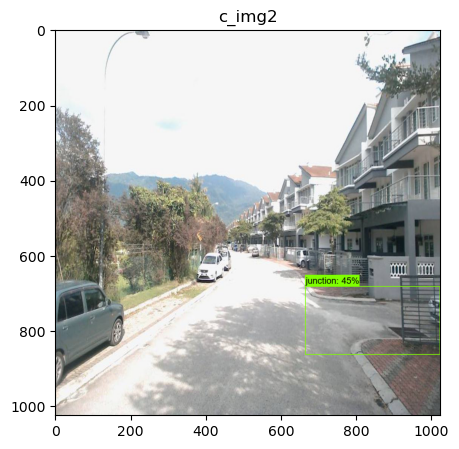

In [14]:
# Convert the normalized coordinates to pixel values
ymin_predicted_2, xmin_predicted_2, ymax_predicted_2, xmax_predicted_2 = boxes[0]
height, width, _ = test_images_np[1][0].shape
xmin_predicted_2 = int(xmin_predicted_2 * width)
xmax_predicted_2 = int(xmax_predicted_2 * width)
ymin_predicted_2 = int(ymin_predicted_2 * height)
ymax_predicted_2 = int(ymax_predicted_2 * height)

plot_detections(
    test_images_np[1][0],
    detections['detection_boxes'][0].numpy(),
    detections['detection_classes'][0].numpy().astype(np.uint32) + label_id_offset,
    detections['detection_scores'][0].numpy(),
    category_index, 
    title = "c_img2",
    figsize=(30, 5))
plt.show()

## calculate IOU

In [15]:
import xml.etree.ElementTree as ET

# Parse the XML file
tree = ET.parse('test/c_img2.xml')
root = tree.getroot()

image_height = 1024
image_width = 1024


i = 1
#Iterate over each object element
for obj in root.findall('object'):
    xmin_ground_2 = int(obj.find('bndbox/xmin').text)
    ymin_ground_2 = int(obj.find('bndbox/ymin').text)
    xmax_ground_2 = int(obj.find('bndbox/xmax').text)
    ymax_ground_2 = int(obj.find('bndbox/ymax').text)

    
    
    ground_truth_box = [ymin_ground_2, xmin_ground_2, ymax_ground_2, xmax_ground_2]
    
    predicted_boxes = boxes.tolist()  # convert Numpy array to list of predicted bounding boxes

    # Initialize a list to store the highest IoU for each ground truth bounding box
    #highest_iou_list = [-1] * len(ground_truth_boxe)

    # Initialize a variable to keep track of the highest IoU for this predicted box
    highest_iou_for_predicted_box = 0
    # Iterate over each predicted bounding box
    for predicted_box in predicted_boxes:
        
        # Convert the predicted box coordinates from normalized values to pixel values
        ymin, xmin, ymax, xmax = predicted_box
        xmin = int(xmin * image_width)
        xmax = int(xmax * image_width)
        ymin = int(ymin * image_height)
        ymax = int(ymax * image_height)
        predicted_box_box = [ymin, xmin, ymax, xmax]
        

        iou_score = iou(ground_truth_box, predicted_box_box)

        #update the highest IoU for this predicted box, if necessary
        if iou_score > highest_iou_for_predicted_box:
            highest_iou_for_predicted_box = iou_score

    # Print the highest IoU for this predicted box
    print(f'Highest IoU for ground truth box {i}:', highest_iou_for_predicted_box)
    print('\n')
    i += 1


Highest IoU for ground truth box 1: 0.664630053923951




## display image and IoU together c_img2

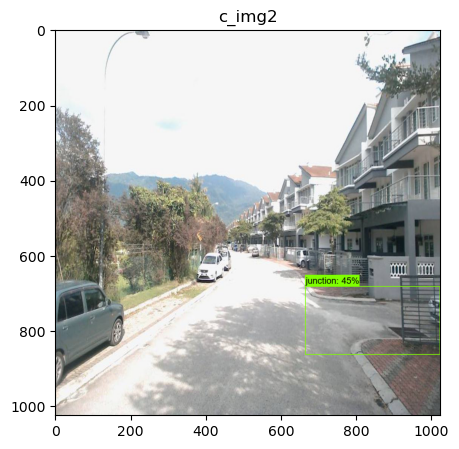

Highest IoU for ground truth box 1: 0.664630053923951




In [16]:
import xml.etree.ElementTree as ET

# Convert the normalized coordinates to pixel values
ymin_predicted_2, xmin_predicted_2, ymax_predicted_2, xmax_predicted_2 = boxes[0]
height, width, _ = test_images_np[1][0].shape
xmin_predicted_2 = int(xmin_predicted_2 * width)
xmax_predicted_2 = int(xmax_predicted_2 * width)
ymin_predicted_2 = int(ymin_predicted_2 * height)
ymax_predicted_2 = int(ymax_predicted_2 * height)

plot_detections(
    test_images_np[1][0],
    detections['detection_boxes'][0].numpy(),
    detections['detection_classes'][0].numpy().astype(np.uint32) + label_id_offset,
    detections['detection_scores'][0].numpy(),
    category_index, 
    title = "c_img2",
    figsize=(30, 5))
plt.show()

# Parse the XML file
tree = ET.parse('test/c_img2.xml')
root = tree.getroot()

image_height = 1024
image_width = 1024


i = 1
#Iterate over each object element
for obj in root.findall('object'):
    xmin_ground_2 = int(obj.find('bndbox/xmin').text)
    ymin_ground_2 = int(obj.find('bndbox/ymin').text)
    xmax_ground_2 = int(obj.find('bndbox/xmax').text)
    ymax_ground_2 = int(obj.find('bndbox/ymax').text)

    
    
    ground_truth_box = [ymin_ground_2, xmin_ground_2, ymax_ground_2, xmax_ground_2]
    
    predicted_boxes = boxes.tolist()  # convert Numpy array to list of predicted bounding boxes

    # Initialize a list to store the highest IoU for each ground truth bounding box
    #highest_iou_list = [-1] * len(ground_truth_boxe)

    # Initialize a variable to keep track of the highest IoU for this predicted box
    highest_iou_for_predicted_box = 0
    # Iterate over each predicted bounding box
    for predicted_box in predicted_boxes:
        
        # Convert the predicted box coordinates from normalized values to pixel values
        ymin, xmin, ymax, xmax = predicted_box
        xmin = int(xmin * image_width)
        xmax = int(xmax * image_width)
        ymin = int(ymin * image_height)
        ymax = int(ymax * image_height)
        predicted_box_box = [ymin, xmin, ymax, xmax]
        

        iou_score = iou(ground_truth_box, predicted_box_box)

        #update the highest IoU for this predicted box, if necessary
        if iou_score > highest_iou_for_predicted_box:
            highest_iou_for_predicted_box = iou_score

    # Print the highest IoU for this predicted box
    print(f'Highest IoU for ground truth box {i}:', highest_iou_for_predicted_box)
    print('\n')
    i += 1


# Performance evaluation for c_img3

## get the coordination of ground truth bounding box for c_img3

In [17]:
label_id_offset = 1
input_tensor = tf.convert_to_tensor(test_images_np[2], dtype=tf.float32)
detections = loaded_detection_fn(input_tensor)

#set threshold to 0.3
score_threshold = 0.3
above_threshold_indices = np.where(detections['detection_scores'][0].numpy() > score_threshold)

boxes = detections['detection_boxes'][0].numpy()[above_threshold_indices]
scores = detections['detection_scores'][0].numpy()[above_threshold_indices]

## get the coordination of predicted bounding box for c_img3

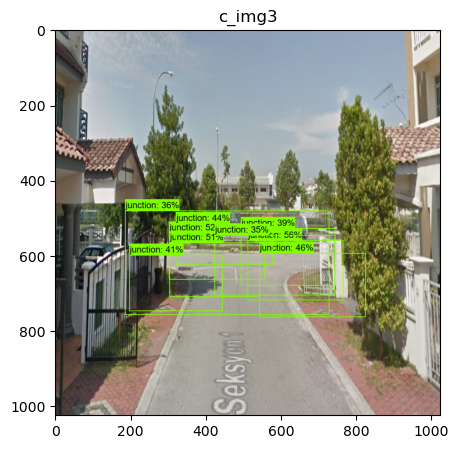

In [18]:
# Convert the normalized coordinates to pixel values
ymin_predicted_3, xmin_predicted_3, ymax_predicted_3, xmax_predicted_3 = boxes[0]
height, width, _ = test_images_np[2][0].shape
xmin_predicted_3 = int(xmin_predicted_3 * width)
xmax_predicted_3 = int(xmax_predicted_3 * width)
ymin_predicted_3 = int(ymin_predicted_3 * height)
ymax_predicted_3 = int(ymax_predicted_3 * height)

plot_detections(
    test_images_np[2][0],
    detections['detection_boxes'][0].numpy(),
    detections['detection_classes'][0].numpy().astype(np.uint32) + label_id_offset,
    detections['detection_scores'][0].numpy(),
    category_index, 
    title = "c_img3",
    figsize=(30, 5))
plt.show()

## calculate IOU

In [19]:
import xml.etree.ElementTree as ET

# Parse the XML file
tree = ET.parse('test/c_img3.xml')
root = tree.getroot()

image_height = 1024
image_width = 1024


i = 1
#Iterate over each object element
for obj in root.findall('object'):
    xmin_ground_3 = int(obj.find('bndbox/xmin').text)
    ymin_ground_3 = int(obj.find('bndbox/ymin').text)
    xmax_ground_3 = int(obj.find('bndbox/xmax').text)
    ymax_ground_3 = int(obj.find('bndbox/ymax').text)

    
    
    ground_truth_box = [ymin_ground_3, xmin_ground_3, ymax_ground_3, xmax_ground_3]
    
    predicted_boxes = boxes.tolist()  # convert Numpy array to list of predicted bounding boxes

    # Initialize a list to store the highest IoU for each ground truth bounding box
    #highest_iou_list = [-1] * len(ground_truth_boxe)

    # Initialize a variable to keep track of the highest IoU for this predicted box
    highest_iou_for_predicted_box = 0
    # Iterate over each predicted bounding box
    for predicted_box in predicted_boxes:
        
        # Convert the predicted box coordinates from normalized values to pixel values
        ymin, xmin, ymax, xmax = predicted_box
        xmin = int(xmin * image_width)
        xmax = int(xmax * image_width)
        ymin = int(ymin * image_height)
        ymax = int(ymax * image_height)
        predicted_box_box = [ymin, xmin, ymax, xmax]
        

        iou_score = iou(ground_truth_box, predicted_box_box)
        
        #update the highest IoU for this predicted box, if necessary
        if iou_score > highest_iou_for_predicted_box:
            highest_iou_for_predicted_box = iou_score

    # Print the highest IoU for this predicted box
    print(f'Highest IoU for ground truth box {i}:', highest_iou_for_predicted_box)
    print('\n')
    i += 1


Highest IoU for ground truth box 1: 0.42648029620274963


Highest IoU for ground truth box 2: 0.8246436392976524




## display image and IoU together c_img3

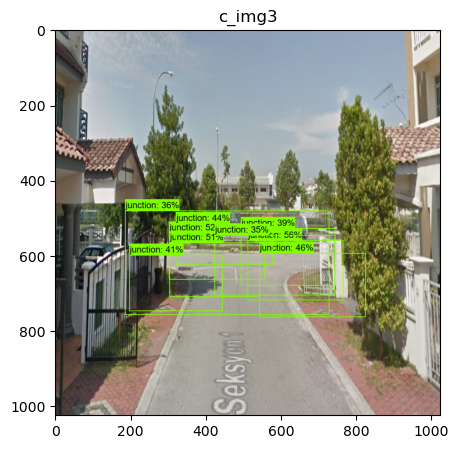

Highest IoU for ground truth box 1: 0.42648029620274963


Highest IoU for ground truth box 2: 0.8246436392976524




In [20]:
import xml.etree.ElementTree as ET

# Convert the normalized coordinates to pixel values
ymin_predicted_3, xmin_predicted_3, ymax_predicted_3, xmax_predicted_3 = boxes[0]
height, width, _ = test_images_np[2][0].shape
xmin_predicted_3 = int(xmin_predicted_3 * width)
xmax_predicted_3 = int(xmax_predicted_3 * width)
ymin_predicted_3 = int(ymin_predicted_3 * height)
ymax_predicted_3 = int(ymax_predicted_3 * height)

plot_detections(
    test_images_np[2][0],
    detections['detection_boxes'][0].numpy(),
    detections['detection_classes'][0].numpy().astype(np.uint32) + label_id_offset,
    detections['detection_scores'][0].numpy(),
    category_index, 
    title = "c_img3",
    figsize=(30, 5))
plt.show()

# Parse the XML file
tree = ET.parse('test/c_img3.xml')
root = tree.getroot()

image_height = 1024
image_width = 1024


i = 1
#Iterate over each object element
for obj in root.findall('object'):
    xmin_ground_3 = int(obj.find('bndbox/xmin').text)
    ymin_ground_3 = int(obj.find('bndbox/ymin').text)
    xmax_ground_3 = int(obj.find('bndbox/xmax').text)
    ymax_ground_3 = int(obj.find('bndbox/ymax').text)

    ground_truth_box = [ymin_ground_3, xmin_ground_3, ymax_ground_3, xmax_ground_3]
    
    predicted_boxes = boxes.tolist()  # convert Numpy array to list of predicted bounding boxes

    # Initialize a list to store the highest IoU for each ground truth bounding box
    #highest_iou_list = [-1] * len(ground_truth_boxe)

    # Initialize a variable to keep track of the highest IoU for this predicted box
    highest_iou_for_predicted_box = 0
    # Iterate over each predicted bounding box
    for predicted_box in predicted_boxes:
        
        # Convert the predicted box coordinates from normalized values to pixel values
        ymin, xmin, ymax, xmax = predicted_box
        xmin = int(xmin * image_width)
        xmax = int(xmax * image_width)
        ymin = int(ymin * image_height)
        ymax = int(ymax * image_height)
        predicted_box_box = [ymin, xmin, ymax, xmax]
        

        iou_score = iou(ground_truth_box, predicted_box_box)
        
        #update the highest IoU for this predicted box, if necessary
        if iou_score > highest_iou_for_predicted_box:
            highest_iou_for_predicted_box = iou_score

    # Print the highest IoU for this predicted box
    print(f'Highest IoU for ground truth box {i}:', highest_iou_for_predicted_box)
    print('\n')
    i += 1

# Performance evaluation for c_img4

## get the coordination of ground truth bounding box for c_img4

In [61]:
label_id_offset = 1
input_tensor = tf.convert_to_tensor(test_images_np[3], dtype=tf.float32)
detections = loaded_detection_fn(input_tensor)

#set threshold to 0.3
score_threshold = 0.3
above_threshold_indices = np.where(detections['detection_scores'][0].numpy() > score_threshold)

boxes = detections['detection_boxes'][0].numpy()[above_threshold_indices]
scores = detections['detection_scores'][0].numpy()[above_threshold_indices]

## get the coordination of predicted bounding box for c_img4

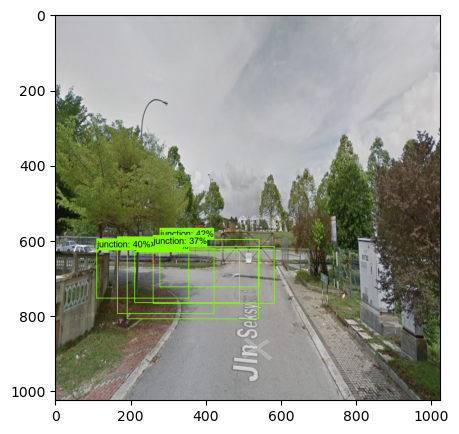

In [62]:
# Convert the normalized coordinates to pixel values
ymin_predicted_4, xmin_predicted_4, ymax_predicted_4, xmax_predicted_4 = boxes[0]
height, width, _ = test_images_np[3][0].shape
xmin_predicted_4 = int(xmin_predicted_4 * width)
xmax_predicted_4 = int(xmax_predicted_4 * width)
ymin_predicted_4 = int(ymin_predicted_4 * height)
ymax_predicted_4 = int(ymax_predicted_4 * height)

plot_detections(
    test_images_np[3][0],
    detections['detection_boxes'][0].numpy(),
    detections['detection_classes'][0].numpy().astype(np.uint32) + label_id_offset,
    detections['detection_scores'][0].numpy(),
    category_index, 
    figsize=(30, 5))
plt.show()

# calculate IOU

In [63]:
import xml.etree.ElementTree as ET

# Parse the XML file
tree = ET.parse('test/c_img4.xml')
root = tree.getroot()

image_height = 1024
image_width = 1024

i = 1
#Iterate over each object element
for obj in root.findall('object'):
    xmin_ground_4 = int(obj.find('bndbox/xmin').text)
    ymin_ground_4 = int(obj.find('bndbox/ymin').text)
    xmax_ground_4 = int(obj.find('bndbox/xmax').text)
    ymax_ground_4 = int(obj.find('bndbox/ymax').text)
    
    ground_truth_box = [ymin_ground_4, xmin_ground_4, ymax_ground_4, xmax_ground_4]
    
    predicted_boxes = boxes.tolist()  # convert Numpy array to list of predicted bounding boxes

    # Initialize a list to store the highest IoU for each ground truth bounding box
    #highest_iou_list = [-1] * len(ground_truth_boxe)

    # Initialize a variable to keep track of the highest IoU for this predicted box
    highest_iou_for_predicted_box = 0
    # Iterate over each predicted bounding box
    for predicted_box in predicted_boxes:
        
        # Convert the predicted box coordinates from normalized values to pixel values
        ymin, xmin, ymax, xmax = predicted_box
        xmin = int(xmin * image_width)
        xmax = int(xmax * image_width)
        ymin = int(ymin * image_height)
        ymax = int(ymax * image_height)
        predicted_box_box = [ymin, xmin, ymax, xmax]
        

        iou_score = iou(ground_truth_box, predicted_box_box)
        
        #update the highest IoU for this predicted box, if necessary
        if iou_score > highest_iou_for_predicted_box:
            highest_iou_for_predicted_box = iou_score

    # Print the highest IoU for this predicted box
    print(f'Highest IoU for ground truth box {i}:', highest_iou_for_predicted_box)
    print('\n')
    i += 1


Highest IoU for ground truth box 1: 0.6932707947195219




## display image and IOU together with c_img4

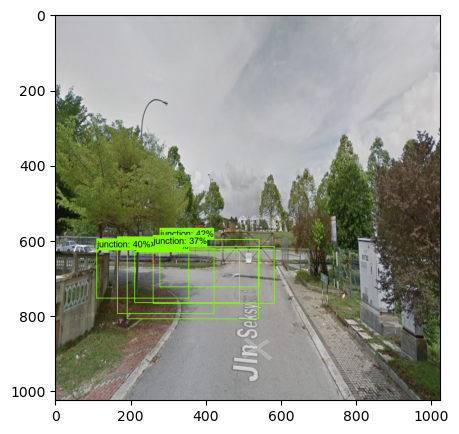

Highest IoU for ground truth box 1: 0.6932707947195219




In [64]:
import xml.etree.ElementTree as ET


# Convert the normalized coordinates to pixel values
ymin_predicted_4, xmin_predicted_4, ymax_predicted_4, xmax_predicted_4 = boxes[0]
height, width, _ = test_images_np[3][0].shape
xmin_predicted_4 = int(xmin_predicted_4 * width)
xmax_predicted_4 = int(xmax_predicted_4 * width)
ymin_predicted_4 = int(ymin_predicted_4 * height)
ymax_predicted_4 = int(ymax_predicted_4 * height)

plot_detections(
    test_images_np[3][0],
    detections['detection_boxes'][0].numpy(),
    detections['detection_classes'][0].numpy().astype(np.uint32) + label_id_offset,
    detections['detection_scores'][0].numpy(),
    category_index, 
    figsize=(30, 5))
plt.show()



# Parse the XML file
tree = ET.parse('test/c_img4.xml')
root = tree.getroot()

image_height = 1024
image_width = 1024

i = 1
#Iterate over each object element
for obj in root.findall('object'):
    xmin_ground_4 = int(obj.find('bndbox/xmin').text)
    ymin_ground_4 = int(obj.find('bndbox/ymin').text)
    xmax_ground_4 = int(obj.find('bndbox/xmax').text)
    ymax_ground_4 = int(obj.find('bndbox/ymax').text)
    
    ground_truth_box = [ymin_ground_4, xmin_ground_4, ymax_ground_4, xmax_ground_4]
    
    predicted_boxes = boxes.tolist()  # convert Numpy array to list of predicted bounding boxes

    # Initialize a list to store the highest IoU for each ground truth bounding box
    #highest_iou_list = [-1] * len(ground_truth_boxe)

    # Initialize a variable to keep track of the highest IoU for this predicted box
    highest_iou_for_predicted_box = 0
    # Iterate over each predicted bounding box
    for predicted_box in predicted_boxes:
        
        # Convert the predicted box coordinates from normalized values to pixel values
        ymin, xmin, ymax, xmax = predicted_box
        xmin = int(xmin * image_width)
        xmax = int(xmax * image_width)
        ymin = int(ymin * image_height)
        ymax = int(ymax * image_height)
        predicted_box_box = [ymin, xmin, ymax, xmax]
        

        iou_score = iou(ground_truth_box, predicted_box_box)
        
        #update the highest IoU for this predicted box, if necessary
        if iou_score > highest_iou_for_predicted_box:
            highest_iou_for_predicted_box = iou_score

    # Print the highest IoU for this predicted box
    print(f'Highest IoU for ground truth box {i}:', highest_iou_for_predicted_box)
    print('\n')
    i += 1


# Performance evaluation for c_img5

## get the coordination of groud truth bounding box for c_img5

In [70]:
label_id_offset = 1
input_tensor = tf.convert_to_tensor(test_images_np[4], dtype=tf.float32)
detections = loaded_detection_fn(input_tensor)

#set threshold to 0.3
score_threshold = 0.3
above_threshold_indices = np.where(detections['detection_scores'][0].numpy() > score_threshold)

boxes = detections['detection_boxes'][0].numpy()[above_threshold_indices]
scores = detections['detection_scores'][0].numpy()[above_threshold_indices]

## get the coordination of predicted bounding box for c_img5

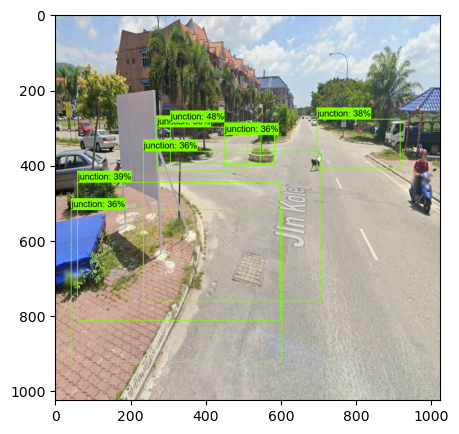

In [71]:
# Convert the normalized coordinates to pixel values
ymin_predicted_5, xmin_predicted_5, ymax_predicted_5, xmax_predicted_5 = boxes[0]
height, width, _ = test_images_np[4][0].shape
xmin_predicted_5 = int(xmin_predicted_5 * width)
xmax_predicted_5 = int(xmax_predicted_5 * width)
ymin_predicted_5 = int(ymin_predicted_5 * height)
ymax_predicted_5 = int(ymax_predicted_5 * height)

plot_detections(
    test_images_np[4][0],
    detections['detection_boxes'][0].numpy(),
    detections['detection_classes'][0].numpy().astype(np.uint32) + label_id_offset,
    detections['detection_scores'][0].numpy(),
    category_index, 
    figsize=(30, 5))
plt.show()

## calculate IOU

In [72]:
import xml.etree.ElementTree as ET

# Parse the XML file
tree = ET.parse('test/c_img5.xml')
root = tree.getroot()

image_height = 1024
image_width = 1024

i = 1
#Iterate over each object element
for obj in root.findall('object'):
    xmin_ground_5 = int(obj.find('bndbox/xmin').text)
    ymin_ground_5 = int(obj.find('bndbox/ymin').text)
    xmax_ground_5 = int(obj.find('bndbox/xmax').text)
    ymax_ground_5 = int(obj.find('bndbox/ymax').text)
    
    ground_truth_box = [ymin_ground_5, xmin_ground_5, ymax_ground_5, xmax_ground_5]
    
    predicted_boxes = boxes.tolist()  # convert Numpy array to list of predicted bounding boxes

    # Initialize a list to store the highest IoU for each ground truth bounding box
    #highest_iou_list = [-1] * len(ground_truth_boxe)

    # Initialize a variable to keep track of the highest IoU for this predicted box
    highest_iou_for_predicted_box = 0
    # Iterate over each predicted bounding box
    for predicted_box in predicted_boxes:
        
        # Convert the predicted box coordinates from normalized values to pixel values
        ymin, xmin, ymax, xmax = predicted_box
        xmin = int(xmin * image_width)
        xmax = int(xmax * image_width)
        ymin = int(ymin * image_height)
        ymax = int(ymax * image_height)
        predicted_box_box = [ymin, xmin, ymax, xmax]
        

        iou_score = iou(ground_truth_box, predicted_box_box)
        
        #update the highest IoU for this predicted box, if necessary
        if iou_score > highest_iou_for_predicted_box:
            highest_iou_for_predicted_box = iou_score

    # Print the highest IoU for this predicted box
    print(f'Highest IoU for ground truth box {i}:', highest_iou_for_predicted_box)
    print('\n')
    i += 1


Highest IoU for ground truth box 1: 0.25018980991892403


Highest IoU for ground truth box 2: 0.4347370626440394


Highest IoU for ground truth box 3: 0.5629995793016407




## display image and IOU together with c_img5

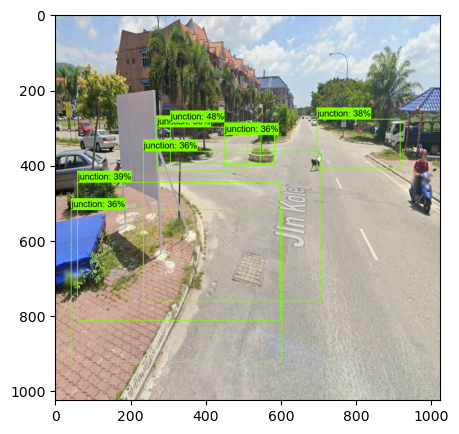

Highest IoU for ground truth box 1: 0.25018980991892403


Highest IoU for ground truth box 2: 0.4347370626440394


Highest IoU for ground truth box 3: 0.5629995793016407




In [73]:
import xml.etree.ElementTree as ET

# Convert the normalized coordinates to pixel values
ymin_predicted_5, xmin_predicted_5, ymax_predicted_5, xmax_predicted_5 = boxes[0]
height, width, _ = test_images_np[4][0].shape
xmin_predicted_5 = int(xmin_predicted_5 * width)
xmax_predicted_5 = int(xmax_predicted_5 * width)
ymin_predicted_5 = int(ymin_predicted_5 * height)
ymax_predicted_5 = int(ymax_predicted_5 * height)

plot_detections(
    test_images_np[4][0],
    detections['detection_boxes'][0].numpy(),
    detections['detection_classes'][0].numpy().astype(np.uint32) + label_id_offset,
    detections['detection_scores'][0].numpy(),
    category_index, 
    figsize=(30, 5))
plt.show()




# Parse the XML file
tree = ET.parse('test/c_img5.xml')
root = tree.getroot()

image_height = 1024
image_width = 1024

i = 1
#Iterate over each object element
for obj in root.findall('object'):
    xmin_ground_5 = int(obj.find('bndbox/xmin').text)
    ymin_ground_5 = int(obj.find('bndbox/ymin').text)
    xmax_ground_5 = int(obj.find('bndbox/xmax').text)
    ymax_ground_5 = int(obj.find('bndbox/ymax').text)
    
    ground_truth_box = [ymin_ground_5, xmin_ground_5, ymax_ground_5, xmax_ground_5]
    
    predicted_boxes = boxes.tolist()  # convert Numpy array to list of predicted bounding boxes

    # Initialize a list to store the highest IoU for each ground truth bounding box
    #highest_iou_list = [-1] * len(ground_truth_boxe)

    # Initialize a variable to keep track of the highest IoU for this predicted box
    highest_iou_for_predicted_box = 0
    # Iterate over each predicted bounding box
    for predicted_box in predicted_boxes:
        
        # Convert the predicted box coordinates from normalized values to pixel values
        ymin, xmin, ymax, xmax = predicted_box
        xmin = int(xmin * image_width)
        xmax = int(xmax * image_width)
        ymin = int(ymin * image_height)
        ymax = int(ymax * image_height)
        predicted_box_box = [ymin, xmin, ymax, xmax]
        

        iou_score = iou(ground_truth_box, predicted_box_box)
        
        #update the highest IoU for this predicted box, if necessary
        if iou_score > highest_iou_for_predicted_box:
            highest_iou_for_predicted_box = iou_score

    # Print the highest IoU for this predicted box
    print(f'Highest IoU for ground truth box {i}:', highest_iou_for_predicted_box)
    print('\n')
    i += 1

# c_img6
1. get the coordination of ground truth bounding box for c_img6
2. get the coordination of predicted bounding box for c_img6
3. use IoU function to calculate the IoU 

# Performance evaluation for c_img6

## get the coordination of ground truth bounding box for c_img6

In [80]:
label_id_offset = 1
input_tensor = tf.convert_to_tensor(test_images_np[5], dtype=tf.float32)
detections = loaded_detection_fn(input_tensor)

#set threshold to 0.3
score_threshold = 0.3
above_threshold_indices = np.where(detections['detection_scores'][0].numpy() > score_threshold)

boxes = detections['detection_boxes'][0].numpy()[above_threshold_indices]
scores = detections['detection_scores'][0].numpy()[above_threshold_indices]

## get the coordination of predicted bounding box for c_img6

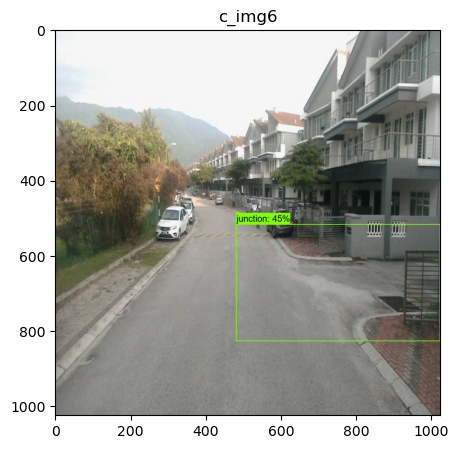

In [81]:
# Convert the normalized coordinates to pixel values
ymin_predicted_6, xmin_predicted_6, ymax_predicted_6, xmax_predicted_6 = boxes[0]
height, width, _ = test_images_np[5][0].shape
xmin_predicted_6 = int(xmin_predicted_6 * width)
xmax_predicted_6 = int(xmax_predicted_6 * width)
ymin_predicted_6 = int(ymin_predicted_6 * height)
ymax_predicted_6 = int(ymax_predicted_6 * height)

plot_detections(
    test_images_np[5][0],
    detections['detection_boxes'][0].numpy(),
    detections['detection_classes'][0].numpy().astype(np.uint32) + label_id_offset,
    detections['detection_scores'][0].numpy(),
    category_index, 
    figsize=(30, 5),
    title = "c_img6")
plt.show()

## calculate IOU

In [82]:
import xml.etree.ElementTree as ET

# Parse the XML file
tree = ET.parse('test/c_img6.xml')
root = tree.getroot()

image_height = 1024
image_width = 1024

i = 1
#Iterate over each object element
for obj in root.findall('object'):
    xmin_ground_6 = int(obj.find('bndbox/xmin').text)
    ymin_ground_6 = int(obj.find('bndbox/ymin').text)
    xmax_ground_6 = int(obj.find('bndbox/xmax').text)
    ymax_ground_6 = int(obj.find('bndbox/ymax').text)
    
    ground_truth_box = [ymin_ground_6, xmin_ground_6, ymax_ground_6, xmax_ground_6]
    
    predicted_boxes = boxes.tolist()  # convert Numpy array to list of predicted bounding boxes

    # Initialize a list to store the highest IoU for each ground truth bounding box
    #highest_iou_list = [-1] * len(ground_truth_boxe)

    # Initialize a variable to keep track of the highest IoU for this predicted box
    highest_iou_for_predicted_box = 0
    # Iterate over each predicted bounding box
    for predicted_box in predicted_boxes:
        
        # Convert the predicted box coordinates from normalized values to pixel values
        ymin, xmin, ymax, xmax = predicted_box
        xmin = int(xmin * image_width)
        xmax = int(xmax * image_width)
        ymin = int(ymin * image_height)
        ymax = int(ymax * image_height)
        predicted_box_box = [ymin, xmin, ymax, xmax]
        

        iou_score = iou(ground_truth_box, predicted_box_box)
        
        #update the highest IoU for this predicted box, if necessary
        if iou_score > highest_iou_for_predicted_box:
            highest_iou_for_predicted_box = iou_score

    # Print the highest IoU for this predicted box
    print(f'Highest IoU for ground truth box {i}:', highest_iou_for_predicted_box)
    print('\n')
    i += 1

Highest IoU for ground truth box 1: 0.6940329801099338




## display image and IOU together with c_img6

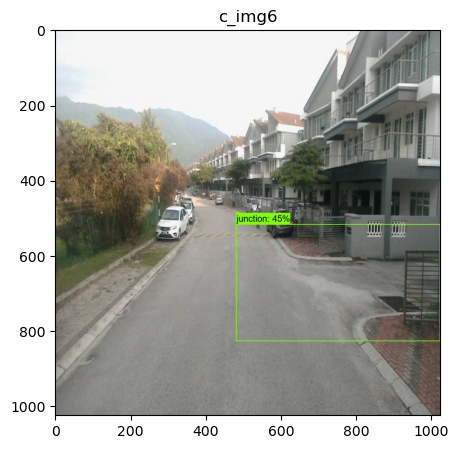

Highest IoU for ground truth box 1: 0.6940329801099338




In [83]:
import xml.etree.ElementTree as ET

# Convert the normalized coordinates to pixel values
ymin_predicted_6, xmin_predicted_6, ymax_predicted_6, xmax_predicted_6 = boxes[0]
height, width, _ = test_images_np[5][0].shape
xmin_predicted_6 = int(xmin_predicted_6 * width)
xmax_predicted_6 = int(xmax_predicted_6 * width)
ymin_predicted_6 = int(ymin_predicted_6 * height)
ymax_predicted_6 = int(ymax_predicted_6 * height)

plot_detections(
    test_images_np[5][0],
    detections['detection_boxes'][0].numpy(),
    detections['detection_classes'][0].numpy().astype(np.uint32) + label_id_offset,bb
    detections['detection_scores'][0].numpy(),
    category_index, 
    title = "c_img6",
    figsize=(30, 5))
plt.show()

# Parse the XML file
tree = ET.parse('test/c_img6.xml')
root = tree.getroot()

image_height = 1024
image_width = 1024

i = 1
#Iterate over each object element
for obj in root.findall('object'):
    xmin_ground_6 = int(obj.find('bndbox/xmin').text)
    ymin_ground_6 = int(obj.find('bndbox/ymin').text)
    xmax_ground_6 = int(obj.find('bndbox/xmax').text)
    ymax_ground_6 = int(obj.find('bndbox/ymax').text)
    
    ground_truth_box = [ymin_ground_6, xmin_ground_6, ymax_ground_6, xmax_ground_6]
    
    predicted_boxes = boxes.tolist()  # convert Numpy array to list of predicted bounding boxes

    # Initialize a list to store the highest IoU for each ground truth bounding box
    #highest_iou_list = [-1] * len(ground_truth_boxe)

    # Initialize a variable to keep track of the highest IoU for this predicted box
    highest_iou_for_predicted_box = 0
    # Iterate over each predicted bounding box
    for predicted_box in predicted_boxes:
        
        # Convert the predicted box coordinates from normalized values to pixel values
        ymin, xmin, ymax, xmax = predicted_box
        xmin = int(xmin * image_width)
        xmax = int(xmax * image_width)
        ymin = int(ymin * image_height)
        ymax = int(ymax * image_height)
        predicted_box_box = [ymin, xmin, ymax, xmax]
        

        iou_score = iou(ground_truth_box, predicted_box_box)
        
        #update the highest IoU for this predicted box, if necessary
        if iou_score > highest_iou_for_predicted_box:
            highest_iou_for_predicted_box = iou_score

    # Print the highest IoU for this predicted box
    print(f'Highest IoU for ground truth box {i}:', highest_iou_for_predicted_box)
    print('\n')
    i += 1